# **Actividad semana 4**

**Nombre:**Cristian Jhovany Montelongo Medina 

**Matricula:** A01793580

**Materia:** Ciencia y analítica de Datos

**Profesor:** Maria de la Paz Rico


**1/Noviembre/2022**

### **Paso1 :** Descargando los datos.

In [62]:
#Importamos las librerías de pandas y numpy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt

In [3]:
#Indicamos la ruta de la BD con la que se trabaja
input ='https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv'

In [12]:
#Generamos una copia de la BD para trabajar sobre esta en todo el ejercicio
clients = pd.read_csv(input)
df = clients.copy()
df.head()

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


### **Paso 2:** Obten la información del DataFrame con los métodos y propiedades: shape, columns, head(), dtypes, info(), isna()

In [5]:
#Re nombramos las variables para una mayor comprensión
df.rename(columns={"X1":"amount","X2":"gender","X3":"education","X4":"marital_status", "X5":"age",
                   "X6":"pay_sep","X7":"pay_aug", "X8":"pay_jul", "X9":"pay_jun", "X10":"pay_may", "X11":"pay_apr",
                   "X12":"bill_sep", "X13":"bill_aug", "X14":"bill_jul", "X15":"bill_jun", "X16":"bill_may", "X17":"bill_apr",
                   "X18":"prev_sep","X19":"prev_aug", "X20":"prev_jul", "X21":"prev_jun", "X22":"prev_may", "X23":"prev_apr"}, inplace = True)

In [11]:
df.head()

,ID,amount,gender,education,marital_status,age,pay_sep,pay_aug,pay_jul,pay_jun,...,bill_jun,bill_may,bill_apr,prev_sep,prev_aug,prev_jul,prev_jun,prev_may,prev_apr,Y
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


In [9]:
#Comprobando cambios en los nombres de las variables
dfr=df.iloc[:,1:25]

In [10]:
dfr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   amount          30000 non-null  int64  
 1   gender          29999 non-null  float64
 2   education       29998 non-null  float64
 3   marital_status  29998 non-null  float64
 4   age             29995 non-null  float64
 5   pay_sep         29997 non-null  float64
 6   pay_aug         29995 non-null  float64
 7   pay_jul         29993 non-null  float64
 8   pay_jun         29991 non-null  float64
 9   pay_may         29984 non-null  float64
 10  pay_apr         29986 non-null  float64
 11  bill_sep        29989 non-null  float64
 12  bill_aug        29989 non-null  float64
 13  bill_jul        29987 non-null  float64
 14  bill_jun        29985 non-null  float64
 15  bill_may        29983 non-null  float64
 16  bill_apr        29990 non-null  float64
 17  prev_sep        29992 non-null 

In [14]:
dfr.shape

(30000, 24)

In [15]:
#Tenemos una base con 25 variables, todas ellas son númericas.
dfr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   amount          30000 non-null  int64  
 1   gender          29999 non-null  float64
 2   education       29998 non-null  float64
 3   marital_status  29998 non-null  float64
 4   age             29995 non-null  float64
 5   pay_sep         29997 non-null  float64
 6   pay_aug         29995 non-null  float64
 7   pay_jul         29993 non-null  float64
 8   pay_jun         29991 non-null  float64
 9   pay_may         29984 non-null  float64
 10  pay_apr         29986 non-null  float64
 11  bill_sep        29989 non-null  float64
 12  bill_aug        29989 non-null  float64
 13  bill_jul        29987 non-null  float64
 14  bill_jun        29985 non-null  float64
 15  bill_may        29983 non-null  float64
 16  bill_apr        29990 non-null  float64
 17  prev_sep        29992 non-null 

In [17]:
#¿falta algún dato?
dfr.isna().values.any()

True

In [18]:
#Contar nulos por variable
dfr.isnull().sum().sort_values(ascending=True)

amount             0
gender             1
education          2
marital_status     2
pay_sep            3
Y                  3
pay_aug            5
prev_apr           5
age                5
pay_jul            7
prev_jul           8
prev_sep           8
pay_jun            9
prev_aug           9
bill_apr          10
prev_may          11
prev_jun          11
bill_sep          11
bill_aug          11
bill_jul          13
pay_apr           14
bill_jun          15
pay_may           16
bill_may          17
dtype: int64

In [22]:
#Contando el total de datos faltantes
dfr.isnull().sum().sum()

0

### **Paso 3:** Limpia los datos eliminando los registros nulos o rellena con la media de la columna

In [23]:
#Se eliminan todas las observaciones con datos faltantes, ya que no considero que sean muchos
dfr.dropna(inplace = True)

In [24]:
dfr.head()

,amount,gender,education,marital_status,age,pay_sep,pay_aug,pay_jul,pay_jun,pay_may,...,bill_jun,bill_may,bill_apr,prev_sep,prev_aug,prev_jul,prev_jun,prev_may,prev_apr,Y
0,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


In [25]:
#revisamos nuevamente si aún quedan observaciones sin información
dfr.isnull().values.any()

False

Teníamos 30,000 observaciones y nos quedaron 29,958, quedó el 99,99% de la información, entonces al eliminar todas las obersevaciones donde faltan datos no impacta en el analisis que se haga

### **Paso 4:** Calcula la estadística descriptiva con describe() y explica las medidas de tendencia central y dispersión

In [ ]:
#Estadisticas descriptivas y medidas de tendencia central.
dfr.describe()
#En la tabla podemos observar que se nos presentan la media y la desviacion estandar,
#con ellas podemos conocer como se encuentran distribuidos nuestros datos(Que tanta dispersion tienen).


,amount,gender,education,marital_status,age,pay_sep,pay_aug,pay_jul,pay_jun,pay_may,...,bill_jun,bill_may,bill_apr,prev_sep,prev_aug,prev_jul,prev_jun,prev_may,prev_apr,Y
count,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,...,29958.000000,29958.000000,29958.000000,29958.000000,2.995800e+04,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000
mean,167555.900928,1.604012,1.853094,1.551739,35.483443,-0.017124,-0.134021,-0.166767,-0.221110,-0.266807,...,43279.335370,40328.984578,38889.925763,5664.614460,5.925715e+03,5228.429969,4829.873556,4801.481574,5220.708025,0.221143
std,129737.299088,0.489070,0.790471,0.521952,9.214319,1.123989,1.197171,1.196026,1.168419,1.132307,...,64364.684347,60826.219326,59582.883301,16568.823518,2.305598e+04,17617.338167,15676.205514,15285.552652,17788.983767,0.415023
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2327.500000,1762.250000,1256.000000,1000.000000,8.352500e+02,390.000000,296.250000,253.250000,118.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19037.500000,18104.500000,17067.500000,2100.000000,2.009000e+03,1800.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54551.250000,50220.750000,49234.750000,5007.000000,5.000000e+03,4511.500000,4014.750000,4040.000000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


### **Paso 5:** Realiza el conteo de las variables categóricas

In [27]:
#La función unique() nos devuelve los elementos unicos por variable
#Según la documentación la variable education es categórica y va de 1 a 4
dfr['education'].unique()

array([2., 1., 3., 5., 4., 6., 0.])

In [28]:
#Entonces los valores 0, 5 y 6 son incorrectos 
#Revisando la frecuencia:
dfr['education'].value_counts()

2.0    14009
1.0    10572
3.0     4909
5.0      280
4.0      123
6.0       51
0.0       14
Name: education, dtype: int64

In [29]:
#Sustituyendo los valores erroneos por el más frecuente
#Esto lo hacemos porque el volumen no es grande
list_edu = [0,5,6]
for i in dfr.index:
  if dfr.loc[i, 'education'] in list_edu:
     dfr.loc[i, 'education'] = 2

In [30]:
#Validando el cambio:
dfr['education'].value_counts()

2.0    14354
1.0    10572
3.0     4909
4.0      123
Name: education, dtype: int64

In [31]:
#Según la documentación la variable marital_status es categórica y va de 1 a 3
dfr['marital_status'].unique()

array([1., 2., 3., 0.])

In [32]:
#Entonces las observaciones con valor igual a 0 son incorrectos 
#Revisando la frecuencia:
dfr['marital_status'].value_counts()

2.0    15939
1.0    13643
3.0      322
0.0       54
Name: marital_status, dtype: int64

### **Paso 6:** Escala los datos, si consideras necesario.

In [33]:
#Sustituyendo los valores erroneos por el más frecuente
#Esto lo hacemos porque el volumen no es grande
for i in dfr.index:
  if dfr.loc[i, 'marital_status'] == 0:
     dfr.loc[i, 'marital_status'] = 2

In [34]:
#Validando el cambio:
dfr['marital_status'].value_counts()

2.0    15993
1.0    13643
3.0      322
Name: marital_status, dtype: int64

In [35]:
del dfr['gender']
del dfr['marital_status']
del dfr['education']
del dfr['pay_sep']
del dfr['pay_aug']
del dfr['pay_jul']
del dfr['pay_jun']
del dfr['pay_may']
del dfr['pay_apr']
del dfr['Y']

In [36]:
#Comprobamos que ya no tenemos variables categóricas
dfr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29958 entries, 0 to 29999
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   amount    29958 non-null  int64  
 1   age       29958 non-null  float64
 2   bill_sep  29958 non-null  float64
 3   bill_aug  29958 non-null  float64
 4   bill_jul  29958 non-null  float64
 5   bill_jun  29958 non-null  float64
 6   bill_may  29958 non-null  float64
 7   bill_apr  29958 non-null  float64
 8   prev_sep  29958 non-null  float64
 9   prev_aug  29958 non-null  float64
 10  prev_jul  29958 non-null  float64
 11  prev_jun  29958 non-null  float64
 12  prev_may  29958 non-null  float64
 13  prev_apr  29958 non-null  float64
dtypes: float64(13), int64(1)
memory usage: 4.4 MB


### **Paso 7:** Reduce las dimensiones con PCA, si consideras necesario.

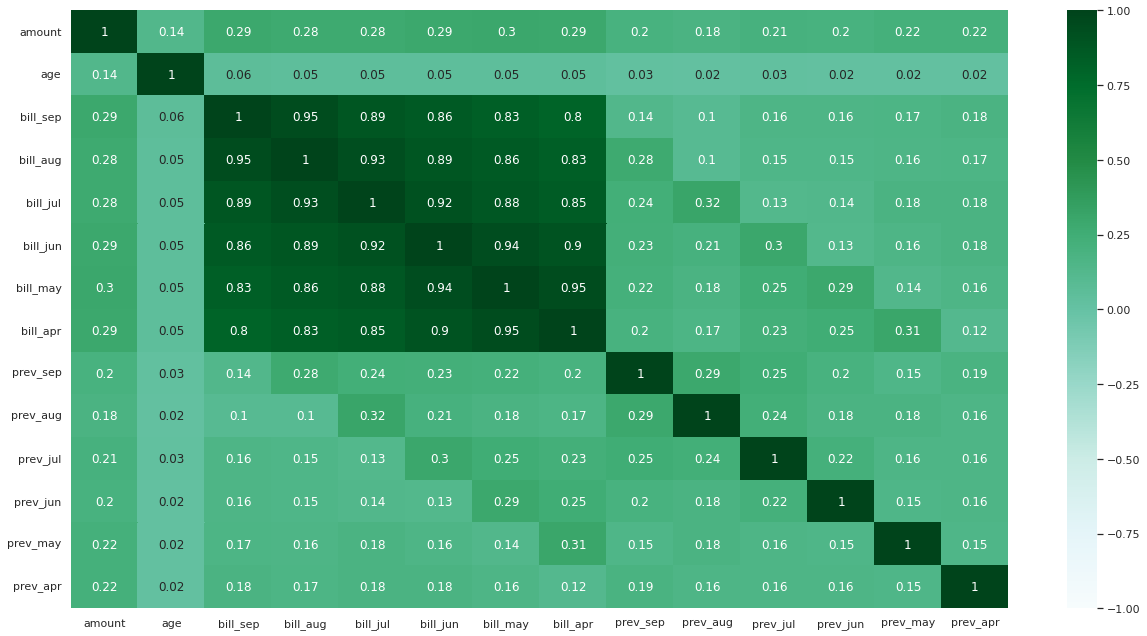

In [37]:
#Veamos la correlación de las variables
corrs = dfr.corr().round(2)

sns.set(rc = {'figure.figsize': (21,11)})
sns.heatmap(corrs, vmin=-1, vmax=1, cmap ='BuGn', annot_kws={'size':12}, annot=True)


Del gráfico anterior, se puede ver que las variables que tienen mayor correlación positiva son los pagos. 

Por otro lado, sabemos que las variables vienen en diferentes escalas, por que que una buena práctica es estandarizar los datos antes de hacer cualquier análisis y por lo tanto sacar conclusiones.

In [39]:
#Estandarizando los datos
dfr_s = preprocessing.scale(dfr)
dfr_scale = pd.DataFrame(dfr_s, columns=dfr.columns)
dfr_scale.head()

,amount,age,bill_sep,bill_aug,bill_jul,bill_jun,bill_may,bill_apr,prev_sep,prev_aug,prev_jul,prev_jun,prev_may,prev_apr
0,-1.137363,-1.246282,-0.642497,-0.647359,-0.667925,-0.672419,-0.663031,-0.652714,-0.341890,-0.227134,-0.296782,-0.308107,-0.314124,-0.293485
1,-0.366561,-1.029224,-0.659205,-0.666697,-0.639201,-0.621583,-0.606229,-0.597982,-0.341890,-0.213645,-0.240019,-0.244315,-0.314124,-0.181054
2,-0.597802,-0.160996,-0.298738,-0.493940,-0.482436,-0.449762,-0.417277,-0.391745,-0.250270,-0.191958,-0.240019,-0.244315,-0.248702,-0.012407
3,-0.906122,0.164590,-0.057797,-0.013586,0.032552,-0.232512,-0.186929,-0.156808,-0.221179,-0.169448,-0.228667,-0.237936,-0.244188,-0.237269
4,-0.906122,2.335161,-0.578648,-0.611297,-0.161383,-0.347080,-0.348260,-0.331626,-0.221179,1.333962,0.270850,0.266021,-0.269048,-0.255314


In [40]:
#Revisando la desviación estandar y la media de los datos
d ={'mean': dfr_scale.mean(axis=0).round(0),'dstd': dfr_scale.std(axis=0).round(0)}
d_scale = pd.DataFrame(data = d)
d_scale

,mean,dstd
amount,-0.0,1.0
age,-0.0,1.0
bill_sep,-0.0,1.0
bill_aug,0.0,1.0
bill_jul,0.0,1.0
bill_jun,0.0,1.0
bill_may,0.0,1.0
bill_apr,0.0,1.0
prev_sep,0.0,1.0
prev_aug,-0.0,1.0


Una vez que los datos están en la misma escala y previamente hicimos limpieza de la información, aplicamos el PCA.

In [43]:
PCS = PCA()
ACP = PCS.fit_transform(dfr_scale).round(2)
ACP

array([[-1.96, -0.54,  1.33, ..., -0.  ,  0.01,  0.01],
       [-1.74, -0.22,  0.86, ...,  0.01, -0.  ,  0.  ],
       [-1.22, -0.29,  0.21, ..., -0.08, -0.04, -0.06],
       ...,
       [-1.29,  0.15,  0.25, ...,  0.03,  0.01, -0.01],
       [ 0.83,  2.42,  0.36, ...,  0.17, -0.14, -0.01],
       [-0.52, -0.6 , -0.75, ..., -0.02,  0.12, -0.05]])

In [44]:
PCS_labels = [f'PC{i+1}' for i in range(len(dfr_scale.columns))]
ACP_df = pd.DataFrame(ACP,columns=PCS_labels)
ACP_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
0,-1.96,-0.54,1.33,-0.18,0.02,0.00,0.01,0.06,0.22,0.02,0.02,-0.00,0.01,0.01
1,-1.74,-0.22,0.86,-0.28,0.05,-0.12,0.10,0.08,-0.29,-0.07,-0.01,0.01,-0.00,0.00
2,-1.22,-0.29,0.21,-0.01,0.13,-0.06,-0.01,0.08,0.28,-0.02,0.11,-0.08,-0.04,-0.06
3,-0.54,-0.67,0.10,0.29,0.01,0.11,-0.13,0.06,0.60,0.14,0.00,0.14,0.02,-0.06
4,-0.85,0.74,-1.39,1.66,-0.32,0.59,-0.54,1.11,1.24,-0.04,-0.02,0.06,-0.04,-0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29953,2.57,-0.69,-0.31,0.52,0.65,0.50,-0.40,0.14,-0.36,2.25,-0.74,0.55,-0.04,-0.21
29954,-1.54,0.19,-0.72,0.55,-0.12,0.07,0.31,0.11,0.15,-0.04,-0.07,-0.01,0.03,-0.00
29955,-1.29,0.15,0.25,0.43,-0.48,-0.18,0.82,0.22,0.97,-0.16,-0.02,0.03,0.01,-0.01
29956,0.83,2.42,0.36,0.22,0.53,2.46,-1.17,-4.27,1.54,-0.23,-0.59,0.17,-0.14,-0.01


### **7.1** Indica la varianza de los datos explicada por cada componente seleccionado. Para actividades de exploración de los datos la varianza > 70%

In [47]:
#Para un mejor entendimiento lo pasamos a un DataFrame donde vemos la varianza de cada componente y la variación acumulada
v = {'var':PCS.explained_variance_ratio_.round(2), 'varcum':PCS.explained_variance_ratio_.cumsum().round(2)}
var_pcs = pd.DataFrame(data = v)
var_pcs.index = PCS_labels
var_pcs

,var,varcum
PC1,0.42,0.42
PC2,0.12,0.55
PC3,0.07,0.62
PC4,0.07,0.69
PC5,0.06,0.75
PC6,0.06,0.81
PC7,0.06,0.87
PC8,0.05,0.92
PC9,0.05,0.97
PC10,0.02,0.99


In [48]:
#Comprobando que no hubo pérdida de información:
var_org=dfr_scale.var().sum().round(3)
var_cp=ACP_df.var().sum().round(3)
print('Varianza BD original:', var_org)
print('Varianza BD componentes:', var_cp)

Varianza BD original: 14.0
Varianza BD componentes: 14.001


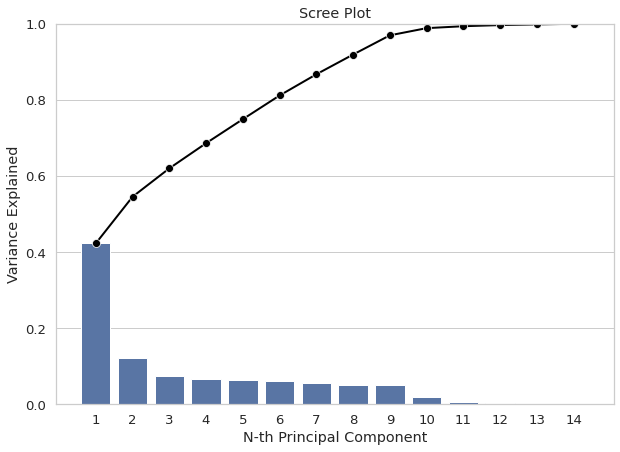

In [51]:
PC_components = np.arange(PCS.n_components_) + 1
#PC_components

_ = sns.set(style = 'whitegrid', 
            font_scale = 1.2
            )

fig, ax = plt.subplots(figsize=(10, 7))

_ = sns.barplot(x = PC_components, 
                y = PCS.explained_variance_ratio_, 
                color = 'b'
                )

_ = sns.lineplot(x = PC_components-1, 
                 y = np.cumsum(PCS.explained_variance_ratio_), 
                 color = 'black', 
                 linestyle = '-', 
                 linewidth = 2, 
                 marker = 'o', 
                 markersize = 8
                 )

plt.title('Scree Plot')
plt.xlabel('N-th Principal Component')
plt.ylabel('Variance Explained')
plt.ylim(0, 1)
plt.show()

### **7.2** Indica la importancia de las variables en cada componente

Podemos ver que el primer componente es el que nos da la mayor varianza, por otro lado es importante mencionar que los últimos 4 componente no aportan nada de varianza.

Ahora, se tiene lo siguiente:


1.   El **80% de varinza** se tiene del componente 1 al componente 6
2.   El **90% de varianza** se tiene del componente 1 al componente 8
2.   El **95% de varianza** se tiene del componente 1 al componente 9



In [54]:
#Veamos como son las combinaciones lineales de cada componente
ACP_cl = pd.DataFrame(
    PCS.components_.round(2),
    columns= ACP_df.columns,
    index = dfr_scale.columns)
ACP_cl.iloc[:, :10]

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
amount,0.17,0.03,0.37,0.38,0.39,0.39,0.39,0.38,0.14,0.12
age,0.30,0.07,-0.19,-0.17,-0.13,-0.12,-0.11,-0.09,0.38,0.41
bill_sep,-0.38,-0.87,-0.03,-0.00,0.03,0.03,0.03,0.02,0.17,0.20
bill_aug,-0.20,0.34,-0.06,0.01,0.06,0.07,0.04,-0.07,0.36,0.35
bill_jul,0.04,-0.04,0.04,0.08,0.11,0.03,-0.11,-0.16,0.23,0.15
bill_jun,-0.08,0.07,-0.04,-0.03,0.10,0.01,-0.10,0.07,0.04,0.41
bill_may,0.11,-0.08,0.01,-0.03,-0.12,0.13,-0.01,0.01,-0.20,-0.28
bill_apr,-0.05,0.03,0.01,-0.14,0.09,0.04,0.05,-0.00,-0.75,0.58
prev_sep,-0.82,0.33,0.01,0.02,-0.02,0.02,0.02,0.06,0.02,-0.11
prev_aug,-0.03,-0.01,0.57,0.39,0.12,-0.21,-0.42,-0.49,-0.06,0.05


**Al respecto, se tiene la composición de los componentes:**


CP1 = *amount* * (0.17)+ *age* * (0.30)+ *bill_sep* * (-0.38) + *bill_aug* * (-0.38) + *bill_jul*	* (0.04) + ..... + *prev_apr* * (0.00)

CP2 = *amount* * (0.03)+ *age* * (-0.19)+ *bill_sep* * (-0.03) + *bill_aug* * (0.34) + *bill_jul*	* (-0.04) + ..... + *prev_apr* * (0.00)

......

CP8 = *amount* * (0.38)+ *age* * (-0.09)+ *bill_sep* * (0.02) + *bill_aug* * (-0.07) + *bill_jul*	* (-0.16) + ..... + *prev_apr* * (0.07)

In [ ]:
#Revisando en valores absolutos máximos por cada componente
ACP_cl.iloc[:,:10].abs().idxmax()

PC1     prev_sep
PC2     bill_sep
PC3     prev_aug
PC4     prev_apr
PC5     prev_apr
PC6     prev_jul
PC7     prev_may
PC8     prev_jul
PC9     bill_apr
PC10    bill_apr
dtype: object

### **Paso 8:** Elabora los histogramas de los atributos para visualizar su distribución

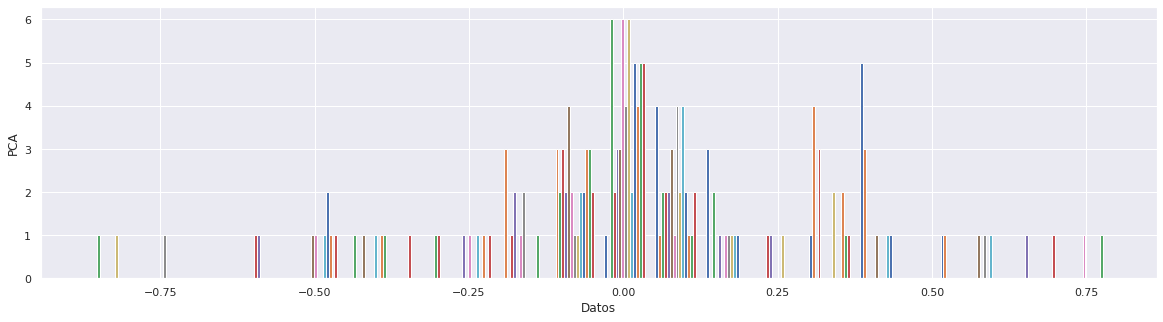

In [65]:
sns.set(rc = {'figure.figsize':(20, 5)})
fig, axes = plt.subplots(1, 8)

Datos = np.array([ACP_cl.iloc])
PCA = np.array(['PC1',	'PC2',	'PC3',	'PC4',	'PC5',	'PC6',	'PC7',	'PC8',	'PC9',	'PC10'])
for k in range(0,1): #Aqui el rango es uno porque solo es una columna, pensandolo bien, hasta puede ser sin for
  plt.subplot(1, 1, k+1) #Aqui donde ponemos Xtrain? va nuestro dataframe
  plt.hist(ACP_cl, bins=20)

  plt.xlabel('Datos')
  if k == 0:
    plt.ylabel('PCA')

### **Paso 9:** Realiza la visualización de los datos usando por lo menos 3 gráficos que consideres adecuados: plot, scatter, jointplot, boxplot, areaplot, pie chart, pairplot, bar chart, etc.

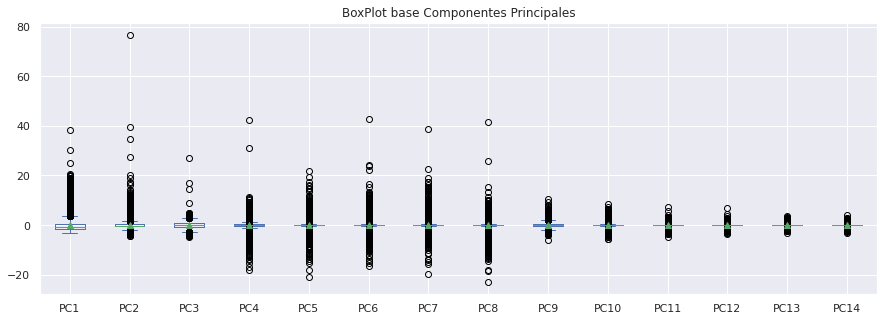

In [73]:
sns.set(rc={'figure.figsize':(15,5)})
ACP_df.plot.box(title='BoxPlot base Componentes Principales', showmeans=True)

El Boxplot se realizo sobre la base del ACP, **en la rúbrica no especifica sobre que base hacerlo.**

Vemos que la base de los Componentes tiene valores atípicos ... una buena práctica sería ponderar los valores atípicos antes de realizar el ACP.

### **Paso 10:** Interpreta y explica cada uno de los gráficos indicando cuál es la información más relevante que podría ayudar en el proceso de toma de decisiones.

**Numero de componentes mínimos**

El número de componentes mínimo tendrían que ser 8, ya que como anteriormente lo explicamos con estos 8 tendríamos al menos el 90% de la varianza de los datos originales, tener menos y posteriormente usar la información para inferir o bien para predecir algo acerca de los datos tendríamos un sesgo por la falta de información, es decir nuestros resultados no serían confiables.

**La variación de los datos que representan esos componentes**

La variación de los datos originales y los datos de las componentes principales es el mismo, con esto validamos que con el 100% de los componentes tenemos la misma varianza.
Con la elección de sólo 8 componentes **se tiene una variación del 92%**.

**Cantidad en % de la pérdida de información después de realizar PCA.**

Decidimos quedarnos con 8 componentes para un primer ejercicio, con esto tenemos 92% de varianza por lo que la **pérdida con esta elección es del 8%.**.

**Importancia de las variables**

Las variables que mayor influencia tienen en las componentes son las variables donde se encuentran los importes de los estados de cuenta y los montos de los pagos previos.

**Recomendacion**

Se recomienda usar PCA cuando la dimensión de la Base de Datos a analizar es muy grande, el beneficio que tiene es que permite simplificar la complejdad de una alta dimensión, por lo tanto PCA permite reducir la información aportada por múltiples variables en combinaciones líneales de estas llamadas Componentes Principales a cambio de un poco de pérdida de la información. 
Adicional, nos beneficia en el tiempo de procesamiento y nos da mayor capacidad para poder implementar diferentes algoritmos por tener una base más pequeña.

Bibliografía.

1. Denis, D. J. (2021, 11 mayo). Applied Univariate, Bivariate, and Multivariate Statistics Using Python: A Beginner’s Guide to Advanced Data Analysis. Wiley. 

https://www.cienciadedatos.net/documentos/py19-pca-python.html